In [2]:
#import json
import numpy as np
import pandas as pd
dir_name = "userAction_Recommendation/"
file_name1 = "boston.csv"
boston_info = pd.read_csv(dir_name + file_name1)
#print(boston_info.head())
file_name2 = "columbus.csv"
columbus_info = pd.read_csv(dir_name + file_name2)
file_name3 = "review_boston.csv"
review_bos = pd.read_csv(dir_name + file_name3)
file_name4 = "review_columbus.csv"
review_col = pd.read_csv(dir_name + file_name4)

In [16]:
from sklearn.cluster import DBSCAN
X = np.array((boston_info.latitude,boston_info.longitude))
X = X.transpose()
#print(X.shape)
clustering = DBSCAN(eps = 0.004, min_samples = 2).fit(X)
print(clustering.labels_)

[ 0  1  0 ... 39  0  0]


No handles with labels found to put in legend.


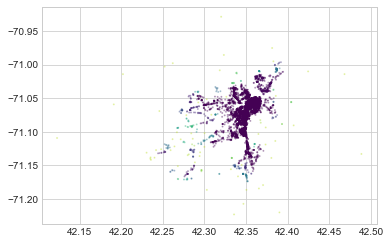

In [18]:
import matplotlib.pyplot as plt 
import matplotlib.colors as colors
import matplotlib.cm as cm
plt.style.use('seaborn-whitegrid')
x_points = X[:, 0]
y_points = X[:, 1]
labels = clustering.labels_
colormap = cm.viridis
color_labels = [colors.rgb2hex(colormap(i)) for i in np.linspace(0, 0.9, max(labels)+1)]
color_list = [color_labels[j] for j in labels]
#print(color_list)
plt.scatter(x_points,y_points,c = color_list, s=5, alpha=0.3)
plt.legend()
plt.show()

In [9]:
labels = clustering.labels_
print(max(labels))

26


In [37]:
print(review_bos.user_id)
print(review_bos[0:1])
boston_info['labels'] = labels
print(boston_info.head())

0         Q8c91v7luItVB0cMFF_mRA
1         99RsBrARhhx60UnAC4yDoA
2         ffJp-ZN80M4sSkDL8Ra18w
3         SIP1Dfwy1M0HWzdgGg9H9g
4         LfyHQWb_kFyxbdNFb8kQGA
                   ...          
755301    etmS0hnNomEm6ujkN4fEHg
755302    UOnDVoe5moX_T1C-sNUKuw
755303    59Gy8CdWmJQXFdmJ3ftC6Q
755304    _ailSgaI-3ztQxRnZtcluw
755305    9U30DANobkrn3Zlu6T9p6Q
Name: user_id, Length: 755306, dtype: object
              business_id                 date               review_id  stars  \
0  EXOsmAB1s71WePlQk0WZrA  2006-04-16 02:58:44  28gGfkLs3igtjVy61lh77Q    2.0   

                  user_id  
0  Q8c91v7luItVB0cMFF_mRA  
              business_id                                         categories  \
0  hcRxdDg7DYryCxCoI8ySQA            Restaurants, Shopping, Shopping Centers   
1  jGennaZUr2MsJyRhijNBfA  Sandwiches, Food, Restaurants, Breakfast & Bru...   
2  iPD8BBvea6YldQZPHzVrSQ  Creperies, Restaurants, Food, Coffee & Tea, Br...   
3  WuoNSCjFBH4OQTSNGc4l6w  Beauty & Spas, Hair Salons

In [76]:
#每一个用户ID生成一个linkedlist，每个linkedlist就是一串商家的聚类名按照日期排列
class Node:
    def __init__(self, dataval = None, date = None):
        self.dataval = dataval
        self.date = date
        #next指向下一个node
        self.next = None
class LinkedList:
    def __init(self):
        self.head = None
    def add(self, NewNode):
        if self.head is None:
            self.head = NewNode
            return
        last_node = self.head
        while(last_node.next):
            last_node = last_node.next
        last_node.next = NewNode
    def insert(self, NewNode):
        if self.head is None:
            self.head = NewNode
            return
        pre_node = self.head
        while(pre_node.next):
            cur_node = pre_node.next
            if cur_node.date > NewNode.date:
                #insert node
                NewNode.next = cur_node
                pre_node.next = NewNode
                return 
            pre_node = pre_node.next
        pre_node.next = NewNode
    def printlist(self):
        printval = self.head
        print('->')
        while printval is not None:
            print(printval.dataval, ' -> ')
            printval = printval.next
        print('None')
    def get_list(self):
        list = []
        node = self.head
        while node is not None:
            list.append(node.dataval)
            node = node.next
        self.list = list
    def get_freq(self):
        self.get_list(self)
        dict = {}
        for value, count in enumerate(self.list):
            dict[value] = count
        self.dict = dict

In [77]:
users = {}
for i in range(len(review_bos)):
    review = review_bos.iloc[i]
    #print(review['user_id'])
    user_id = review['user_id']
    #user_id = review.user_id.astype('str').astype('string')
    #user_id = review['user_id'].astype(str)
    #user_id = str(user_id)
    #print(user_id)
    if user_id not in users:
        #user_id = review.user_id
        node = Node(review.business_id, review.date)
        users[user_id] = LinkedList()
        users[user_id].head = node
    else:
        #user_id = review.user_id
        node = Node(review.business_id, review.date)
        users[user_id].insert(node)
print(len(users))

273116


In [83]:
j = 0
#for i in users:
    #if j < 10:
        #users[i].printlist()
    #j+=1
        

In [89]:
Labels = np.array([boston_info.business_id, boston_info.labels])
Labels = Labels.transpose()

print(len(Labels)) 

8263
